In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                    

In [ ]:
cifar10=keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original=train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170508288/170498071 [==============================] - 2s 0us/step


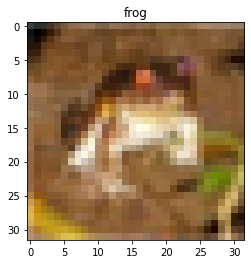

[6]


In [ ]:
import matplotlib.pyplot as plt
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_data[0])
plt.title(category[int(train_label_original[0])])
plt.show()
print(train_label_original[0])

In [ ]:
train_history=model.fit(train_data,train_label,epochs=30,batch_size=512)

Epoch 1/30
98/98 [==============================] - 19s 53ms/step - loss: 9.6240 - accuracy: 0.2190
Epoch 2/30
98/98 [==============================] - 4s 46ms/step - loss: 2.1368 - accuracy: 0.2923
Epoch 3/30
98/98 [==============================] - 4s 46ms/step - loss: 1.8840 - accuracy: 0.3650
Epoch 4/30
98/98 [==============================] - 5s 48ms/step - loss: 1.6792 - accuracy: 0.4211
Epoch 5/30
98/98 [==============================] - 5s 46ms/step - loss: 1.4999 - accuracy: 0.4845
Epoch 6/30
98/98 [==============================] - 5s 47ms/step - loss: 1.3624 - accuracy: 0.5344
Epoch 7/30
98/98 [==============================] - 5s 47ms/step - loss: 1.1919 - accuracy: 0.5916
Epoch 8/30
98/98 [==============================] - 5s 49ms/step - loss: 1.1298 - accuracy: 0.6205
Epoch 9/30
98/98 [==============================] - 5s 47ms/step - loss: 0.9931 - accuracy: 0.6644
Epoch 10/30
98/98 [==============================] - 5s 48ms/step - loss: 0.8609 - accuracy: 0.7072
Epoch 11

In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 2s 4ms/step - loss: 3.8820 - accuracy: 0.6089
0.6089000105857849


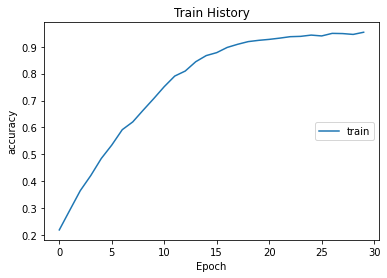

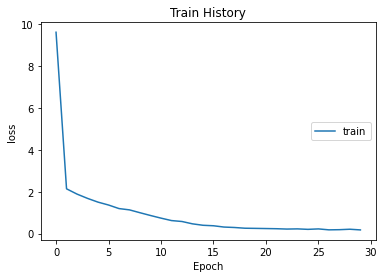

In [ ]:
#繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')